Training a neural network can become unstable given the choice of error function, learning rate, or even the scale of the target variable.

Large updates to weights during training can cause a numerical overflow or underflow often referred to as “exploding gradients.”

The problem of exploding gradients is more common with recurrent neural networks, such as LSTMs given the accumulation of gradients unrolled over hundreds of input time steps.

A common and relatively easy solution to the exploding gradients problem is to change the derivative of the error before propagating it backward through the network and using it to update the weights. Two approaches include rescaling the gradients given a chosen vector norm and clipping gradient values that exceed a preferred range. Together, these methods are referred to as “gradient clipping.”

## Exploding Gradients and Clipping
Neural networks are trained using the stochastic gradient descent optimization algorithm.

This requires first the estimation of the loss on one or more training examples, then the calculation of the derivative of the loss, which is propagated backward through the network in order to update the weights. Weights are updated using a fraction of the back propagated error controlled by the learning rate.

It is possible for the updates to the weights to be so large that the weights either overflow or underflow their numerical precision. In practice, the weights can take on the value of an “NaN” or “Inf” when they overflow or underflow and for practical purposes the network will be useless from that point forward, forever predicting NaN values as signals flow through the invalid weights.

The underflow or overflow of weights is generally refers to as an instability of the network training process and is known by the name “exploding gradients” as the unstable training process causes the network to fail to train in such a way that the model is essentially useless.

In a given neural network, such as a Convolutional Neural Network or Multilayer Perceptron, this can happen due to a poor choice of configuration. Some examples include:

Poor choice of learning rate that results in large weight updates.
Poor choice of data preparation, allowing large differences in the target variable.
Poor choice of loss function, allowing the calculation of large error values.
Exploding gradients is also a problem in recurrent neural networks such as the Long Short-Term Memory network given the accumulation of error gradients in the unrolled recurrent structure.

Exploding gradients can be avoided in general by careful configuration of the network model, such as choice of small learning rate, scaled target variables, and a standard loss function. Nevertheless, exploding gradients may still be an issue with recurrent networks with a large number of input time steps.

Train: nan, Test: nan


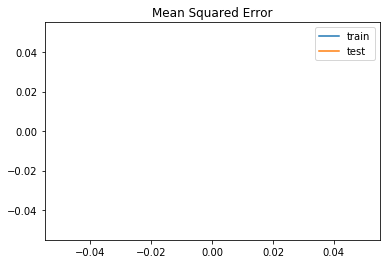

In [4]:
# mlp with unscaled data for the regression problem
from sklearn.datasets import make_regression
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
# compile model
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01, momentum=0.9))
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


## MLP With Gradient Norm Scaling
We can update the training of the model in the previous section to add gradient norm scaling.

This can be implemented by setting the “clipnorm” argument on the optimizer.

For example, the gradients can be rescaled to have a vector norm (magnitude or length) of 1.0, as follows:

Train: 2.288, Test: 20.196


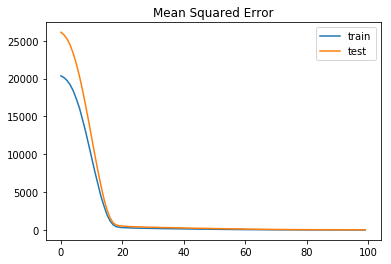

In [5]:
# mlp with unscaled data for the regression problem with gradient norm scaling
from sklearn.datasets import make_regression
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
# compile model
opt = SGD(lr=0.01, momentum=0.9, clipnorm=1.0)
model.compile(loss='mean_squared_error', optimizer=opt)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# MLP With Gradient Value Clipping
Another solution to the exploding gradient problem is to clip the gradient if it becomes too large or too small.

We can update the training of the MLP to use gradient clipping by adding the “clipvalue” argument to the optimization algorithm configuration. For example, the code below clips the gradient to the range [-5 to 5].

Train: 76.015, Test: 101.802


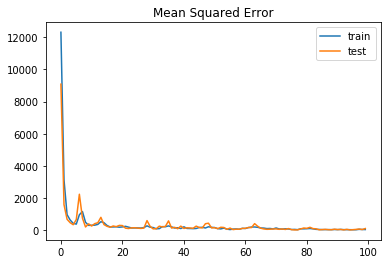

In [6]:
# mlp with unscaled data for the regression problem with gradient clipping
from sklearn.datasets import make_regression
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
# compile model
opt = SGD(lr=0.01, momentum=0.9, clipvalue=5.0)
model.compile(loss='mean_squared_error', optimizer=opt)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()